Pandas for data processing, Seaborn for cool visualizations, matplotlib for figures, graphviz for awesome graph visualization and Scikit-Learn for preprocessing and machine learning algorithms.

Importing of those libraries:

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.display import display #display decision tree directly in jupyter notebook
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import accuracy_score

Preparing the data sets

Firstly, by using excel, we can manually merge the two files, poker-hand-writing-true.data and poker-hand-testing.data, into a single CSV file, named pokerhand-data.csv.

Secondly, we loads the "poker-hand-data.csv" dataset into Pandas DataFrame called "data". 
Thirdly, we creates 16 different training/test subsets using the train_test_split() function from scikit-learn with different proportions of training and test data specified in the proportions list.



In [3]:
# Load the merged data into a pandas DataFrame
data = pd.read_csv('poker-hand-data.csv', header=None)

# Split the DataFrame into features and labels
features = data.iloc[:, :-1]
labels = data.iloc[:, -1]

# Shuffle the data randomly
data = data.sample(frac=1)

# Create 16 subsets with different training/test proportions
proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
subsets = []
for train_prop, test_prop in proportions:
    feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=train_prop,
                                                        test_size=test_prop, stratify=labels)
    subsets.append((feature_train, label_train, feature_test, label_test))

This code below renames the column labels of a pandas DataFrame data to more descriptive names

In [4]:
data.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Poker Hand']
data.columns

Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5',
       'Poker Hand'],
      dtype='object')

In [5]:
data.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Poker Hand
722180,3,1,4,11,1,7,1,1,4,13,1
873344,3,7,4,13,2,3,1,2,3,6,0
839004,2,11,2,2,1,1,1,3,3,2,1
326692,3,2,2,1,2,2,3,1,4,7,2
611421,1,10,1,8,1,9,4,12,4,3,0


Visualizing the distributions of classes in all the data sets (the original set, training set, and test set)
of all proportions (40/60, 60/40, 80/20, 90/10)

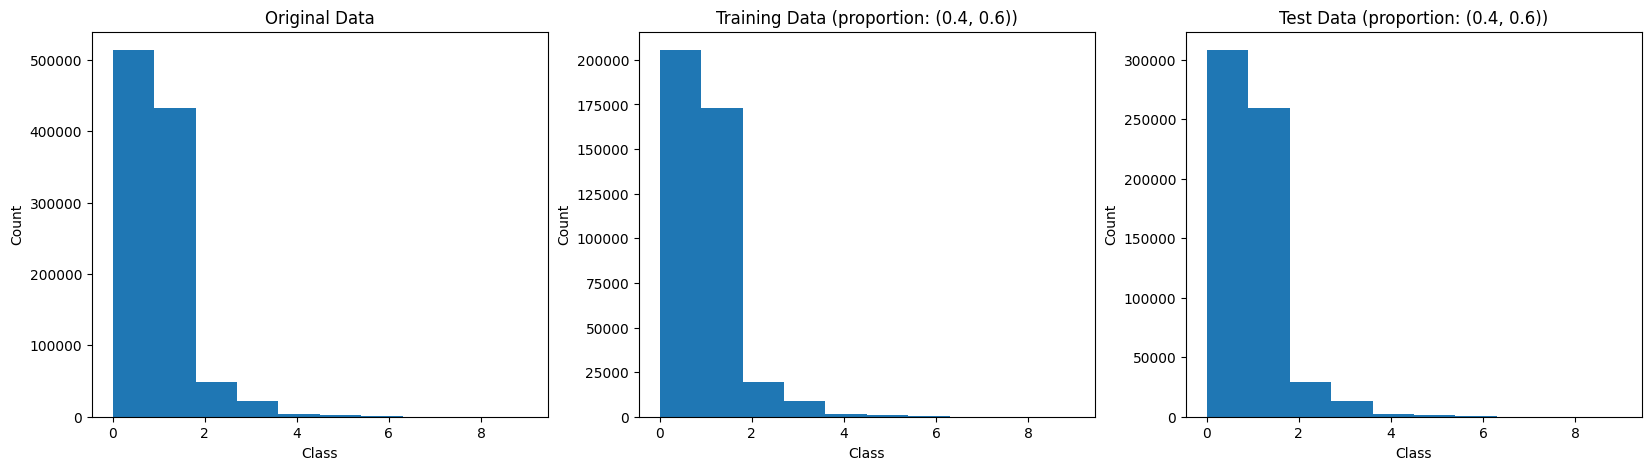

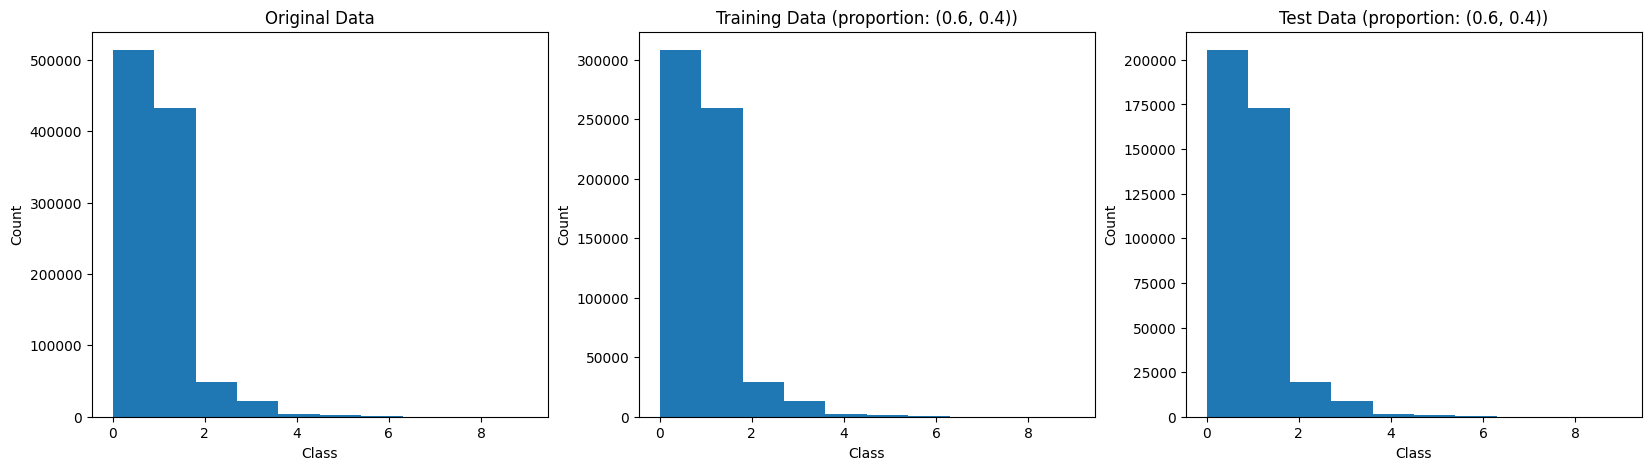

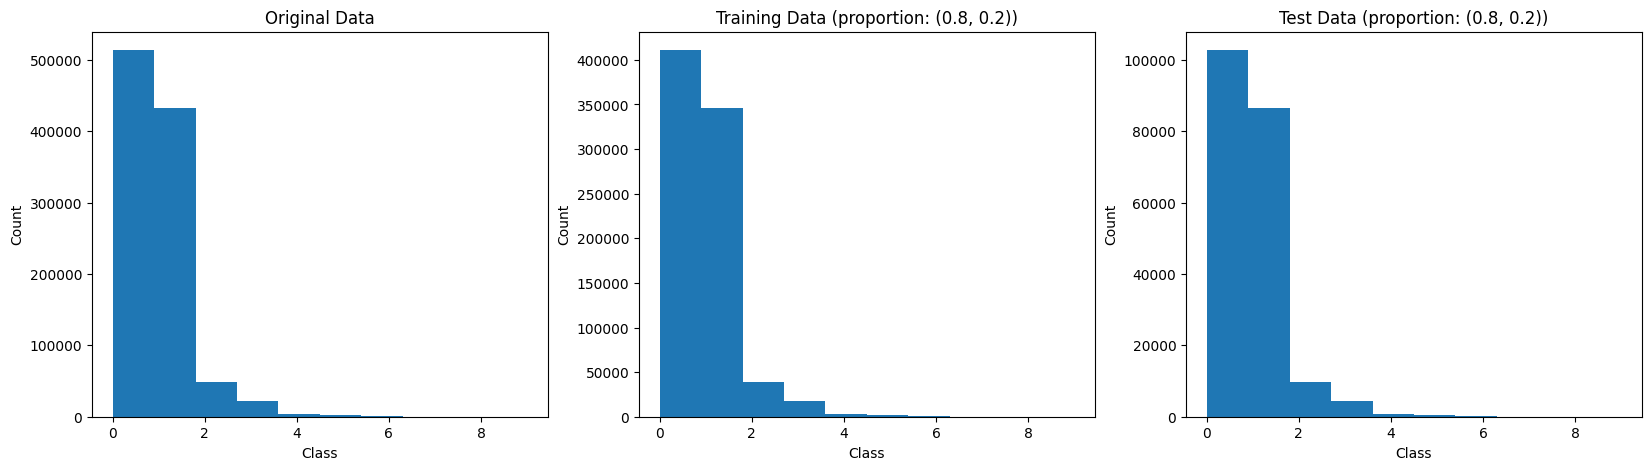

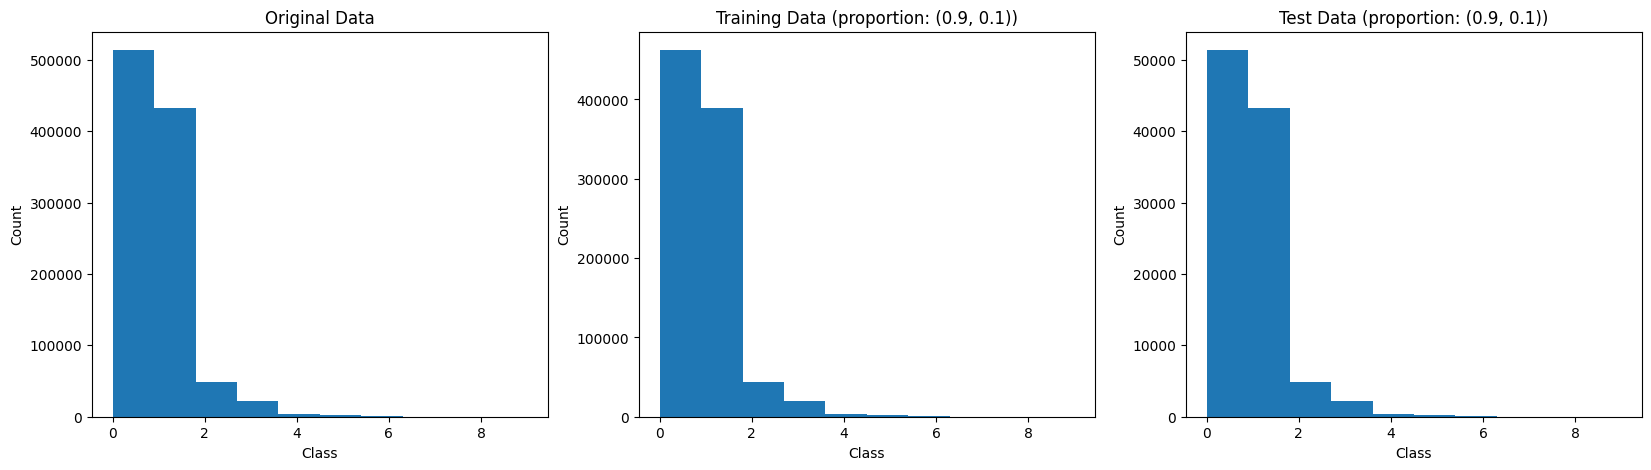

In [23]:
# Visualize the distributions of classes in all subsets

for i, (feature_train, label_train, feature_test, label_test) in enumerate(subsets):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.hist(labels, bins=10)
    plt.title('Original Data')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.subplot(1, 3, 2)
    plt.hist(label_train, bins=10)
    plt.title(f'Training Data (proportion: {proportions[i]})')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.subplot(1, 3, 3)
    plt.hist(label_test, bins=10)
    plt.title(f'Test Data (proportion: {proportions[i]})')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

This 2 line below code creates two new variables:

X: This variable contains all the features of the dataset except the target variable "Poker Hand". It is created by dropping the column "Poker Hand" from the original DataFrame.

Y: This variable contains the target variable "Poker Hand" of the dataset. It is created by selecting only the column "Poker Hand" from the original DataFrame.

In [7]:
X=data.drop(['Poker Hand'], axis=1)
Y=data['Poker Hand']

In [8]:
X.columns

Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5'], dtype='object')

Building the Decision Tree Classifier using the features and labels of the poker hand dataset. 

The data is split into different training and test subsets according to different proportions specified in the proportions list. 

The classifier is trained on each of these subsets with a maximum depth of 7. 

After training, the decision tree is visualized using graphviz and saved as a PDF file with a name that indicates the proportion of the training and test data. Finally, the decision tree is displayed in a window.

Decision Tree Classifier with proportion 40/60


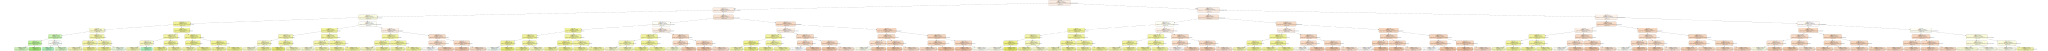

Decision Tree Classifier with proportion 60/40


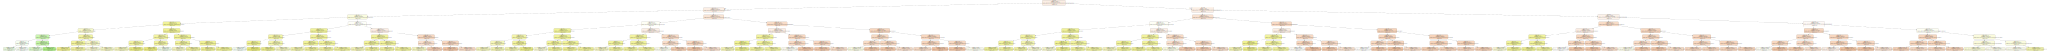

Decision Tree Classifier with proportion 80/20


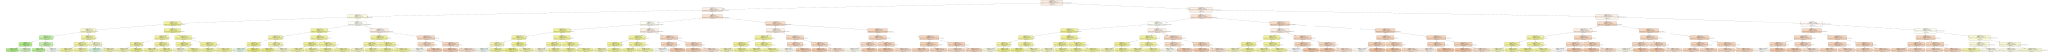

Decision Tree Classifier with proportion 90/10


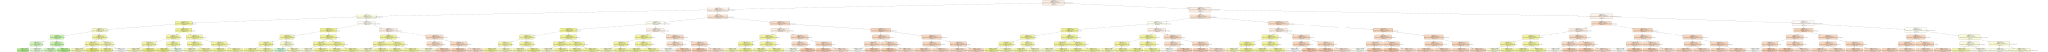

In [20]:
for train_prop, test_prop in proportions:
    feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=train_prop,
                                                        test_size=test_prop, stratify=labels)
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=7)
    clf = clf.fit(feature_train, label_train)
    dot_data = export_graphviz(clf, out_file=None, 
                            feature_names=X.columns, class_names=X.columns,  
                            filled=True, rounded=True,  
                            special_characters=True) 
    print(f"Decision Tree Classifier with proportion {int(train_prop*100)}/{int(test_prop*100)}") 
    graph = graphviz.Source(dot_data)
    display(graph)


Training a decision tree classifier on different subsets of the poker hand dataset and evaluating its performance on a test set using a confusion matrix and a classification report.

Decision Tree Classifier report:
Proportion 40/60
                 precision    recall  f1-score   support

        Nothing       0.71      0.70      0.71    308221
       One Pair       0.58      0.58      0.58    259858
      Two Pairs       0.27      0.29      0.28     29297
Three of a Kind       0.29      0.32      0.31     12980
       Straight       0.23      0.25      0.24      2387
          Flush       0.04      0.06      0.05      1230
     Full House       0.12      0.14      0.13       876
 Four of a Kind       0.07      0.07      0.07       142
 Straight Flush       0.00      0.00      0.00        10
    Royal Flush       0.00      0.00      0.00         5

       accuracy                           0.62    615006
      macro avg       0.23      0.24      0.24    615006
   weighted avg       0.62      0.62      0.62    615006



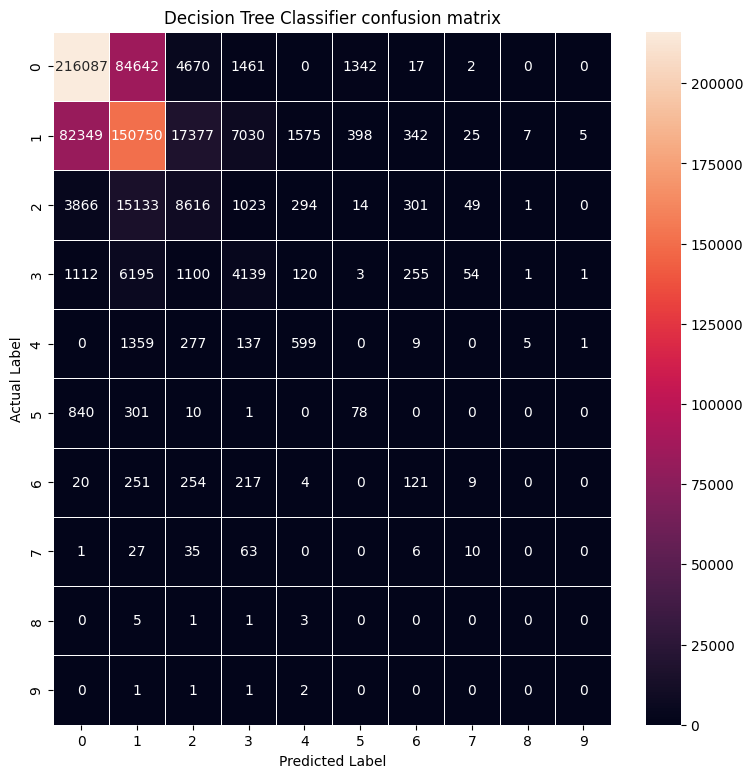

Decision Tree Classifier report:
Proportion 60/40
                 precision    recall  f1-score   support

        Nothing       0.72      0.71      0.72    205481
       One Pair       0.60      0.60      0.60    173239
      Two Pairs       0.28      0.30      0.29     19531
Three of a Kind       0.34      0.36      0.35      8654
       Straight       0.25      0.26      0.26      1591
          Flush       0.07      0.11      0.09       820
     Full House       0.11      0.13      0.12       584
 Four of a Kind       0.19      0.20      0.19        94
 Straight Flush       0.00      0.00      0.00         7
    Royal Flush       0.00      0.00      0.00         3

       accuracy                           0.63    410004
      macro avg       0.25      0.27      0.26    410004
   weighted avg       0.64      0.63      0.63    410004



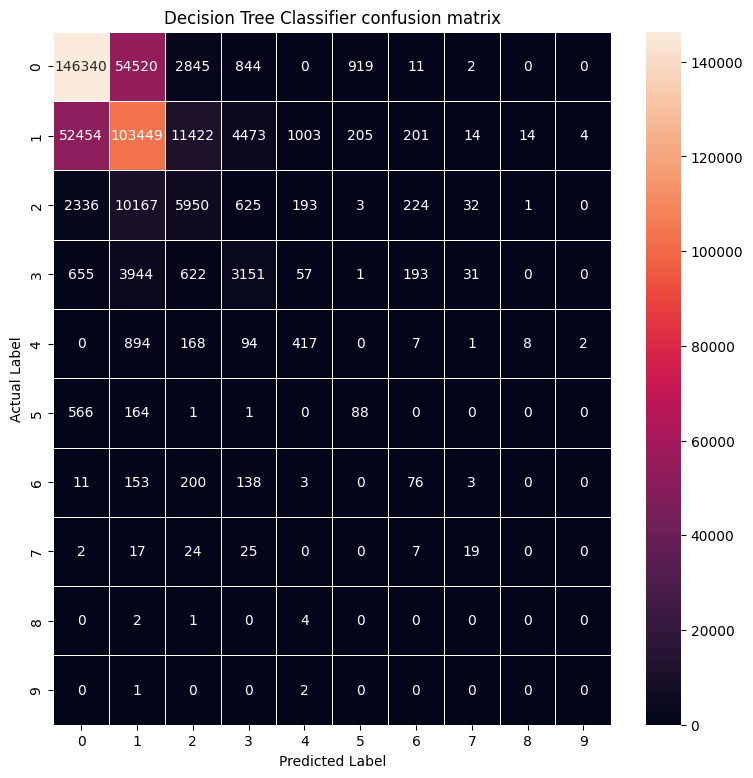

Decision Tree Classifier report:
Proportion 80/20
                 precision    recall  f1-score   support

        Nothing       0.73      0.72      0.72    102740
       One Pair       0.60      0.60      0.60     86619
      Two Pairs       0.30      0.32      0.31      9766
Three of a Kind       0.35      0.39      0.36      4327
       Straight       0.29      0.31      0.30       796
          Flush       0.09      0.13      0.11       410
     Full House       0.13      0.17      0.14       292
 Four of a Kind       0.13      0.15      0.14        47
 Straight Flush       0.00      0.00      0.00         3
    Royal Flush       0.00      0.00      0.00         2

       accuracy                           0.64    205002
      macro avg       0.26      0.28      0.27    205002
   weighted avg       0.64      0.64      0.64    205002



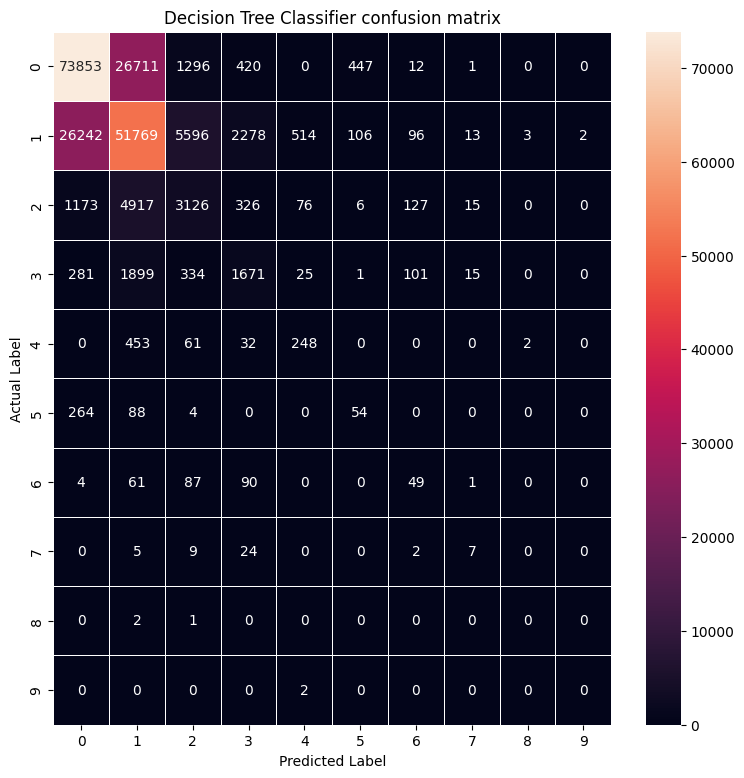

Decision Tree Classifier report:
Proportion 90/10
                 precision    recall  f1-score   support

        Nothing       0.74      0.73      0.73     51370
       One Pair       0.61      0.61      0.61     43310
      Two Pairs       0.31      0.33      0.32      4883
Three of a Kind       0.35      0.40      0.37      2163
       Straight       0.30      0.33      0.31       398
          Flush       0.10      0.15      0.12       205
     Full House       0.10      0.12      0.11       146
 Four of a Kind       0.19      0.22      0.20        23
 Straight Flush       0.00      0.00      0.00         2
    Royal Flush       0.00      0.00      0.00         1

       accuracy                           0.65    102501
      macro avg       0.27      0.29      0.28    102501
   weighted avg       0.65      0.65      0.65    102501



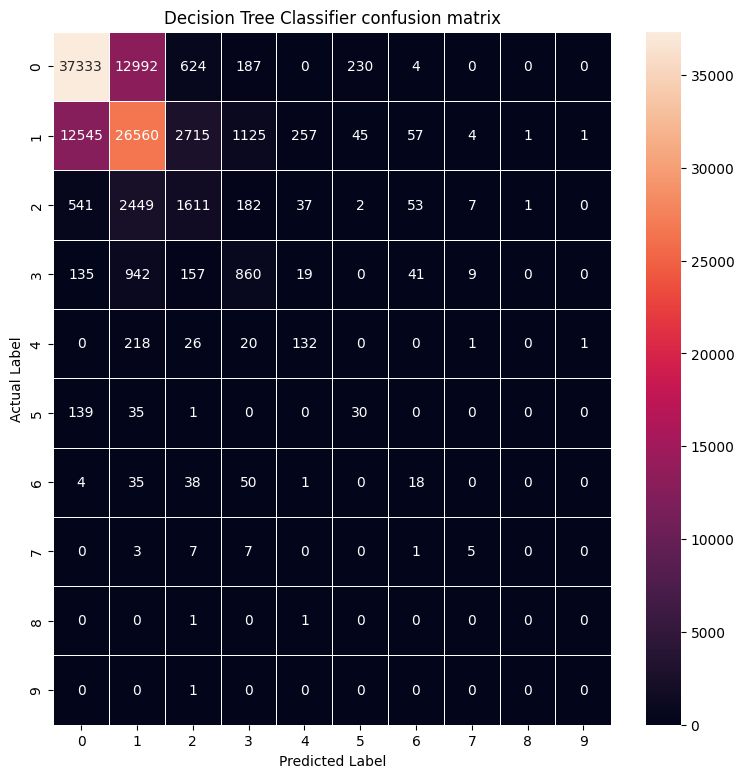

In [28]:
class_labels = ['Nothing', 'One Pair', 'Two Pairs', 'Three of a Kind', 'Straight', 'Flush', 'Full House', 'Four of a Kind', 'Straight Flush', 'Royal Flush']
for train_size, test_size in proportions:
    # Split data into train and test sets
    feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=train_size, 
                                                        test_size=test_size, stratify=labels, shuffle=True)

    # Fit decision tree classifier to training set
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(feature_train, label_train)

    # Predict test set labels
    label_pred = clf.predict(feature_test)

    # Generate classification report and confusion matrix
    print("Decision Tree Classifier report:")
    print(f"Proportion {int(train_size*100)}/{int(test_size*100)}")
    print(classification_report(label_test, label_pred, labels=range(10), target_names=class_labels))
    cfm = confusion_matrix(label_test, label_pred)
    plt.figure(figsize=(9, 9))
    sns.heatmap(cfm, annot=True, fmt='d', linewidths=.5)
    plt.title('Decision Tree Classifier confusion matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()
    

Drawn the Decision Tree by graphviz for each max_depth value.

Decision Tree Classifier with depth = 2


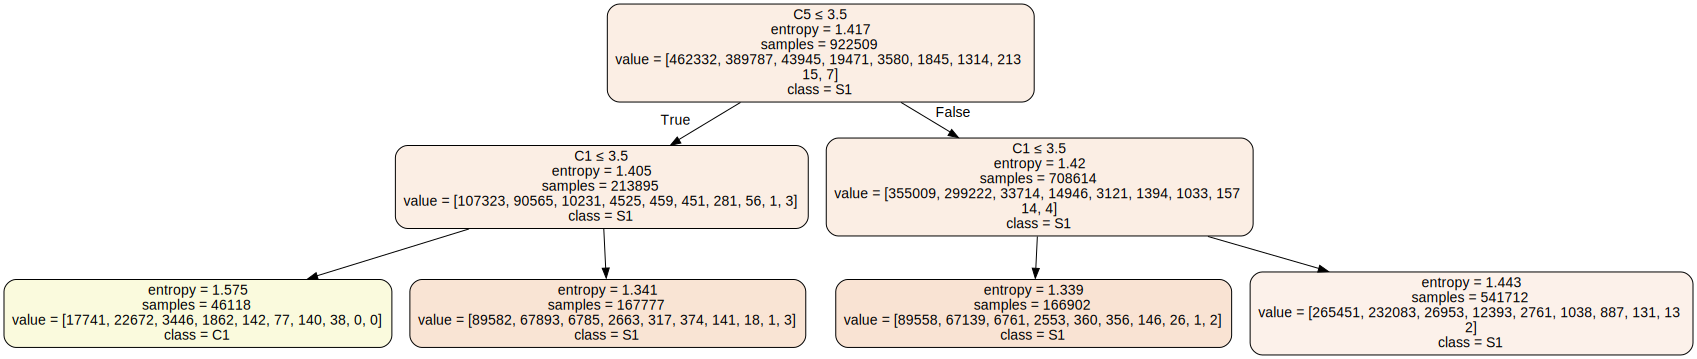

Decision Tree Classifier with depth = 3


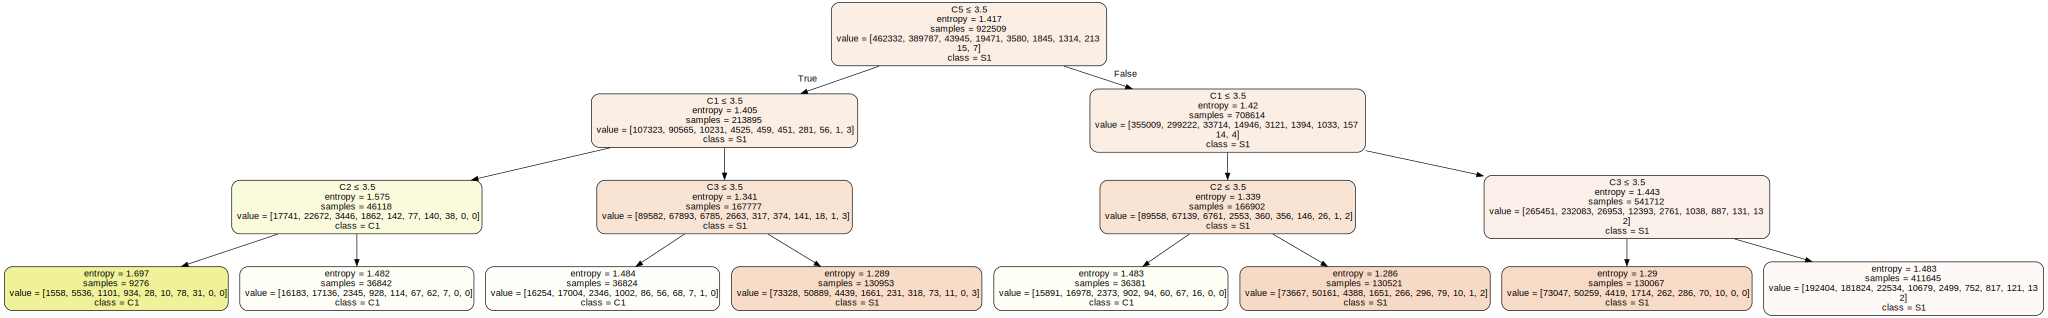

Decision Tree Classifier with depth = 4


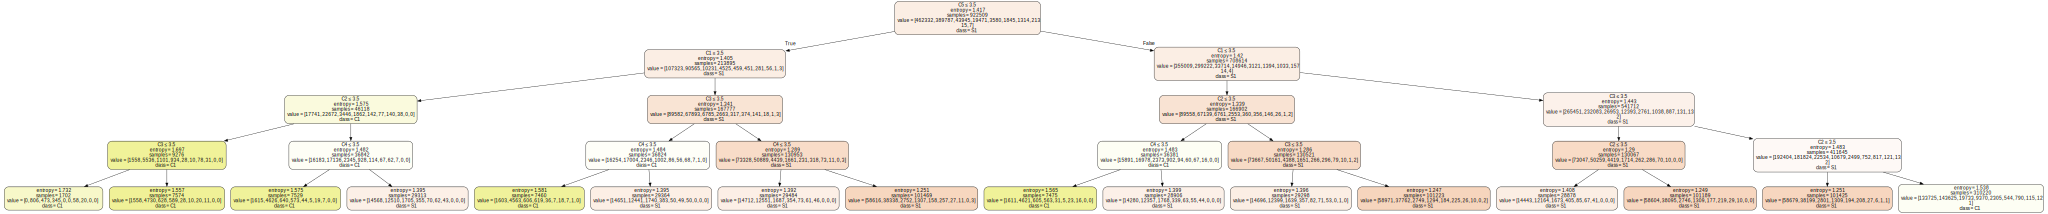

Decision Tree Classifier with depth = 5


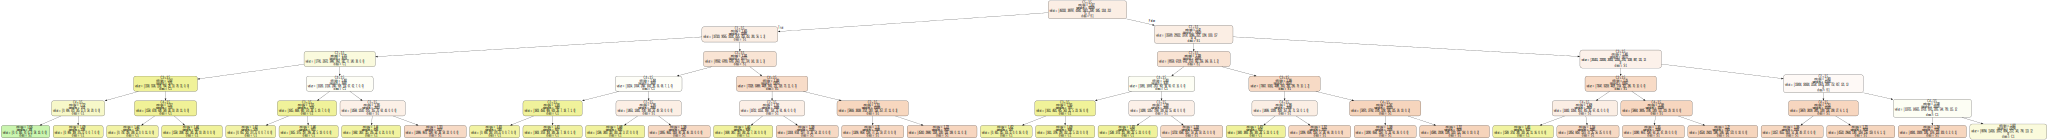

Decision Tree Classifier with depth = 6


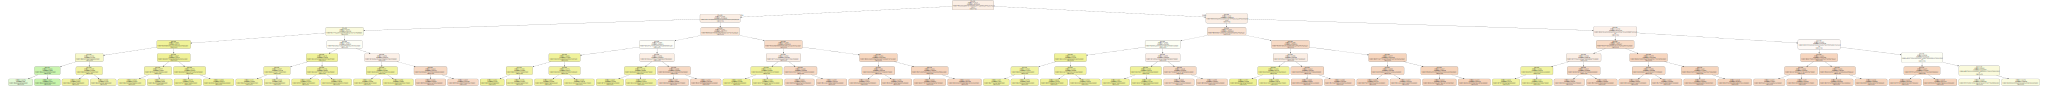

Decision Tree Classifier with depth = 7


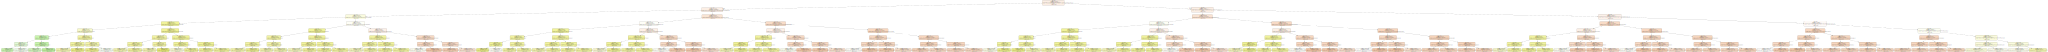

In [22]:
max_depths = [2, 3, 4, 5, 6, 7] #max_depth = None is not included because it takes too long to run
for max_depth in max_depths:
    # Create and fit decision tree classifier on training set
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(feature_train, label_train)
    # Visualize decision tree using graphviz
    dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns, class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    print(f"Decision Tree Classifier with depth = {int(max_depth)}") 
    graph = graphviz.Source(dot_data)
    display(graph)

Evaluating the accuracy_score (on the test set) of the Decision Tree Classifier when changing the value of parameter max_depth.

In [12]:
# Define list of max_depth values to try
max_depths = [None, 2, 3, 4, 5, 6, 7]
accuracy_scores = []


feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=0.8, test_size=0.2, stratify=labels)

# Loop over max_depth values
for max_depth in max_depths:
    # Create and fit decision tree classifier on training set
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(feature_train, label_train)

    # Make predictions on test set and calculate accuracy
    y_pred = clf.predict(feature_test)
    
    accuracy_scores.append(accuracy_score(label_test, y_pred))
    
    #print the accuracy of max_depth
    print("Accuracy of max_depth = {}: {}".format(max_depth, accuracy_score(label_test, y_pred)))
    

Accuracy of max_depth = None: 0.6402230222144174
Accuracy of max_depth = 2: 0.506068233480649
Accuracy of max_depth = 3: 0.508380406044819
Accuracy of max_depth = 4: 0.5254680442142028
Accuracy of max_depth = 5: 0.5570677359245275
Accuracy of max_depth = 6: 0.5570677359245275
Accuracy of max_depth = 7: 0.5573604159959415


Drawn a chart that shows the accuracy_score of the Decision Tree Classifier when changing the value of parameter max_depth.

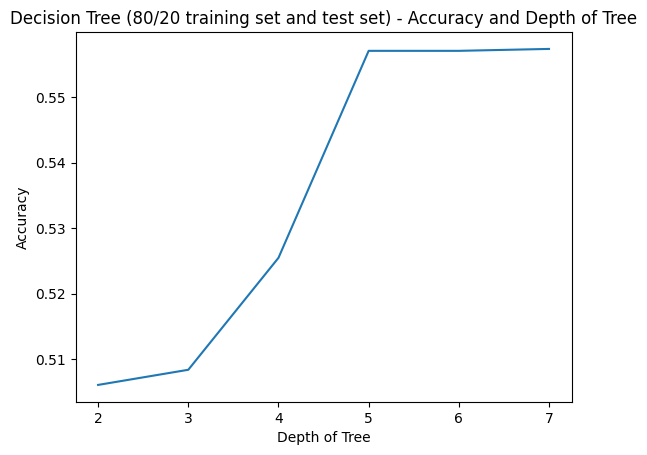

In [13]:
#draw a chart between max_depth and accuracy
plt.plot(max_depths, accuracy_scores)
plt.title('Decision Tree (80/20 training set and test set) - Accuracy and Depth of Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.show()
